# Plots for paper

In [81]:
%matplotlib inline
import gc
%config InlineBackend.figure_format = 'retina'
from matplotlib.pylab import *
import matplotlib.pyplot as plt 
rcParams['figure.figsize'] = (12,9)
rcParams['font.size'] = 32
#import logging

In [2]:
import pynbody
import pynbody.plot.sph as sph
import mmap
pynbody.ramses.multiprocess_num = 24
pynbody.config['number_of_threads'] = 128

In [3]:
pynbody.openmp.get_cpus()

24

## We need output 16 and 121 for the paper ... These correspond to z = 16 and z = 8 respectively

In [25]:
gc.collect()

0

In [26]:
s = pynbody.load('output_00016')
s['pos']
s['pos'] -= 0.5
s.physical_units();

INFO:pynbody:Loading using backend <class 'pynbody.snapshot.ramses.RamsesSnap'>
INFO:pynbody.snapshot.ramses:Loading hydro files
INFO:pynbody.snapshot.ramses:Done
INFO:pynbody.snapshot.ramses:Loading data from CPU 23
INFO:pynbody.snapshot.ramses:Loading data from CPU 45
INFO:pynbody.snapshot.ramses:Loading data from CPU 56
INFO:pynbody.snapshot.ramses:Loading data from CPU 67
INFO:pynbody.snapshot.ramses:Loading data from CPU 78
INFO:pynbody.snapshot.ramses:Loading data from CPU 111
INFO:pynbody.snapshot.ramses:Loading data from CPU 122
INFO:pynbody.snapshot.ramses:Loading data from CPU 133
INFO:pynbody.snapshot.ramses:Loading data from CPU 144
INFO:pynbody.snapshot.ramses:Loading data from CPU 155
INFO:pynbody.snapshot.ramses:Loading data from CPU 166
INFO:pynbody.snapshot.ramses:Loading data from CPU 177
INFO:pynbody.snapshot.ramses:Loading data from CPU 188
INFO:pynbody.snapshot.ramses:Loading data from CPU 12
INFO:pynbody.snapshot.ramses:Loading data from CPU 199
INFO:pynbody.snaps

In [27]:
z = 1/s.properties['a']-1
print ("Redshift =",z)
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print (boxsizestring)

Redshift = 15.999252484667519
248.10 kpc


In [34]:
s.g['metal'][s.g['metal']<=1e-7]    = 1e-10 # Since we divide by Z below, don't use 0.0
#s.g['pgf'][s.g['pgf']>(1.0-1e-10)]  = 1.0
s.g['pzf'][s.g['pzf']<=1e-7]        = 1e-10
s.g['zsolar']  = s.g['metal'] * 50.0         # Solar units
s.g['pzsolar'] = s.g['pzf'] * 50.0           # Solar units

#s.s['metal'][s.s['metal']<1e-10]    = 1e-10
#s.s['ppf'][s.s['ppf']>(1.0-1e-10)]  = 1.0
#s.s['pzf'][s.s['pzf']<1e-10]        = 1e-10
#s.s['zsolar']  = s.s['metal'] * 50.0         # Solar units
#s.s['pzsolar'] = s.s['pzf'] * 50.0           # Solar units


In [29]:
sbox = 40.0 / (1.0 + z) * 0.71 # 40 kpc comoving box
smallbox = str(sbox) + " kpc"
print(smallbox)

1.6706616967784547 kpc


In [30]:
bogus=s.s['zsolar']<s.s['pzsolar']
print("Z_sol of SPs with Z<Z_p",s.s['pzsolar'][bogus])
print("Z_P of SPs with Z<Z_p",s.s['zsolar'][bogus])
print("Number of stars this z",len(s.s['pzsolar']))

KeyError: 'No derivation rule for zsolar'

In [31]:
# z=16, i=0 : -20.26, -122.12, 40.22
# z=16, i=770 : 43.96, 26.56, 121.94
# z=16, i=1540 : 44.54, 19.03, 118.77

rx,ry,rz = 44.54, 19.03, 118.77
i=1540
print(rx,ry,rz)

impData = s[pynbody.filt.Cuboid(str((rx-sbox/2.0)) + " kpc", str((ry-sbox/2.0)) + " kpc",str((rz-sbox/4.0)) + " kpc",
                                str((rx+sbox/2.0)) + " kpc", str((ry+sbox/2.0)) + " kpc",str((rz+sbox/4.0)) + " kpc")]

44.54 19.03 118.77


In [39]:
print(z,i)

15.999252484667519 1540


INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


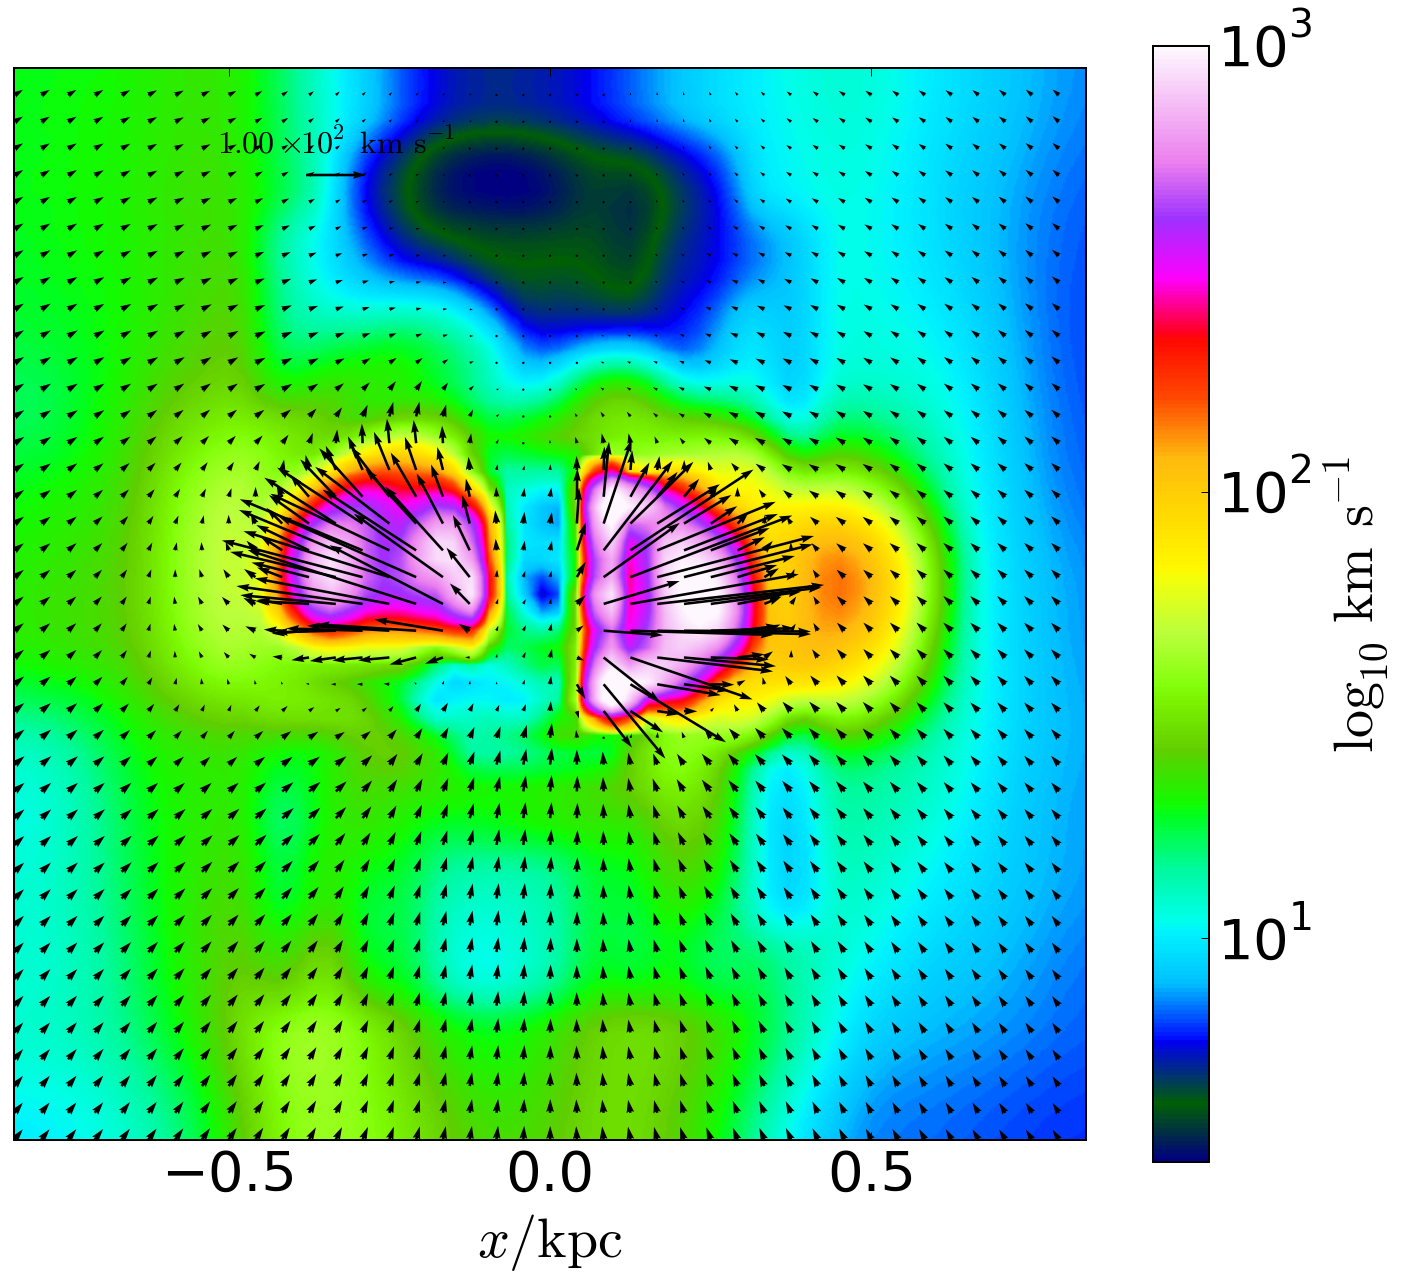

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
with pynbody.transformation.translate(impData,coords):
    ax.yaxis.set_visible(False)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',#qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                   show_cbar=True, vector_color='black')
#plt.close(fig)

In [51]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    fileOut="img_Z-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\;Z_{\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut="img_PGF-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "PGF - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pgf",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax = 1.0, vmin=1e-7, qtytitle="$log_{10}\; PGF$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    fileOut="img_PZ-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{P, \odot}$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
            
    plt.savefig(fileOut)
    plt.close(fig)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    fileOut="img_Density-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_Temp-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Temp - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',#qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                   show_cbar=True, vector_color='black')
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...


$Z_{\odot}$ - z = 16.0
PGF - z = 16.0

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



$Z_{P, \odot}$ - z = 16.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



Density - z = 16.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



Temp - z = 16.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



$v_{t}$ @ z = 16.0
Thin slice @ [-44.54, -19.03, -118.77]

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...


In [55]:
fileNames=[
    "img_Z-z=%.1lf-%i.pdf"% (z,i),
    "img_PGF-z=%.1lf-%i.pdf"% (z,i),
    "img_PZ-z=%.1lf-%i.pdf"% (z,i),
    "img_Density-z=%.1lf-%i.pdf"% (z,i),
    "img_Temp-z=%.1lf-%i.pdf"% (z,i),
    "img_vt-z=%.1lf-%i.pdf"% (z,i)
]
print(fileNames[5])

img_vt-z=16.0-1540.pdf


In [ ]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    fileOut="img_Z-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\;Z_{\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut="img_PGF-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "PGF - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pgf",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax = 1.0, vmin=1e-7, qtytitle="$log_{10}\; PGF$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    fileOut="img_PZ-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{P, \odot}$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
            
    plt.savefig(fileOut)
    plt.close(fig)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    fileOut="img_Density-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_Temp-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Temp - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',#qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                   show_cbar=True, vector_color='black')
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)

# Next

In [56]:
del(s)
gc.collect()

39867

In [57]:
s = pynbody.load('output_00121')
s['pos']
s['pos'] -= 0.5
s.physical_units();

INFO:pynbody:Loading using backend <class 'pynbody.snapshot.ramses.RamsesSnap'>
INFO:pynbody.snapshot.ramses:Loading hydro files
INFO:pynbody.snapshot.ramses:Done
INFO:pynbody.snapshot.ramses:Loading data from CPU 1
INFO:pynbody.snapshot.ramses:Loading data from CPU 12
INFO:pynbody.snapshot.ramses:Loading data from CPU 23
INFO:pynbody.snapshot.ramses:Loading data from CPU 34
INFO:pynbody.snapshot.ramses:Loading data from CPU 45
INFO:pynbody.snapshot.ramses:Loading data from CPU 56
INFO:pynbody.snapshot.ramses:Loading data from CPU 67
INFO:pynbody.snapshot.ramses:Loading data from CPU 78
INFO:pynbody.snapshot.ramses:Loading data from CPU 89
INFO:pynbody.snapshot.ramses:Loading data from CPU 100
INFO:pynbody.snapshot.ramses:Loading data from CPU 111
INFO:pynbody.snapshot.ramses:Loading data from CPU 122
INFO:pynbody.snapshot.ramses:Loading data from CPU 133
INFO:pynbody.snapshot.ramses:Loading data from CPU 144
INFO:pynbody.snapshot.ramses:Loading data from CPU 155
INFO:pynbody.snapshot.

In [58]:
z = 1/s.properties['a']-1
print ("Redshift =",z)
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print (boxsizestring)

Redshift = 7.999933327855002
468.62 kpc


In [59]:
sbox = 40.0 / (1.0 + z) * 0.71 # 40 kpc comoving box
smallbox = str(sbox) + " kpc"
print(smallbox)

3.1555789321351235 kpc


In [60]:
s.g['metal'][s.g['metal']<1e-7]    = 1e-10 # Since we divide by Z below, don't use 0.0
#s2.g['pgf'][s2.g['pgf']>(1.0-1e-10)]  = 1.0
s.g['pzf'][s.g['pzf']<1e-7]        = 1e-10
s.g['zsolar']  = s.g['metal'] * 50.0         # Solar units
s.g['pzsolar'] = s.g['pzf'] * 50.0          # Solar units

#s2.s['metal'][s2.s['metal']<1e-10]    = 1e-10
#s2.s['ppf'][s2.s['ppf']>(1.0-1e-10)]  = 1.0
#s2.s['pzf'][s2.s['pzf']<1e-10]        = 1e-10
#s2.s['zsolar']  = s2.s['metal'] * 50.0         # Solar units
#s2.s['pzsolar'] = s2.s['pzf'] * 50.0          # Solar units

In [61]:
gc.collect()

0

In [62]:
# z=8, i=0 : -121.77, -104.01, -203.10
# z=8, i=265793 : -0.88, 215.56, 143.27
# z=8, i=531586 : 77.55, 54.08, 218.96
# z=8, i=797379 : 137.45, -200.82, -220.27

rx,ry,rz = -121.77, -104.01, -203.10
i=0
print(rx,ry,rz)
impData = s[pynbody.filt.Cuboid(str((rx-sbox/2.0)) + " kpc", str((ry-sbox/2.0)) + " kpc",str((rz-sbox/4.0)) + " kpc",
                                str((rx+sbox/2.0)) + " kpc", str((ry+sbox/2.0)) + " kpc",str((rz+sbox/4.0)) + " kpc")]
print(z,i)

-121.77 -104.01 -203.1
7.999933327855002 0


In [63]:
pwd

'/Volumes/Mac Pro Bay 2 2TB/RAMSES-Data/27Aug-3Mpc'

In [88]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    #ax.set_xlabel(fontsize=40)
    fileOut="img_Z-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\;Z_{\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,

    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut="img_PGF-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "PGF - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pgf",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax = 1.0, vmin=1e-7, qtytitle="$log_{10}\; PGF$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    fileOut="img_PZ-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{P, \odot}$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
            
    plt.savefig(fileOut)
    plt.close(fig)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    fileOut="img_Density-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_Temp-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Temp - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',#qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                   show_cbar=True, vector_color='black')
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...


$Z_{\odot}$ - z = 8.0
PGF - z = 8.0

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



$Z_{P, \odot}$ - z = 8.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



Density - z = 8.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



Temp - z = 8.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



$v_{t}$ @ z = 8.0
Thin slice @ [121.77, 104.01, 203.1]

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...


INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...


$Z_{\odot}$ - z = 8.0
PGF - z = 8.0

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



$Z_{P, \odot}$ - z = 8.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



Density - z = 8.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



Temp - z = 8.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



$v_{t}$ @ z = 8.0
Thin slice @ [121.77, 104.01, 203.1]

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...


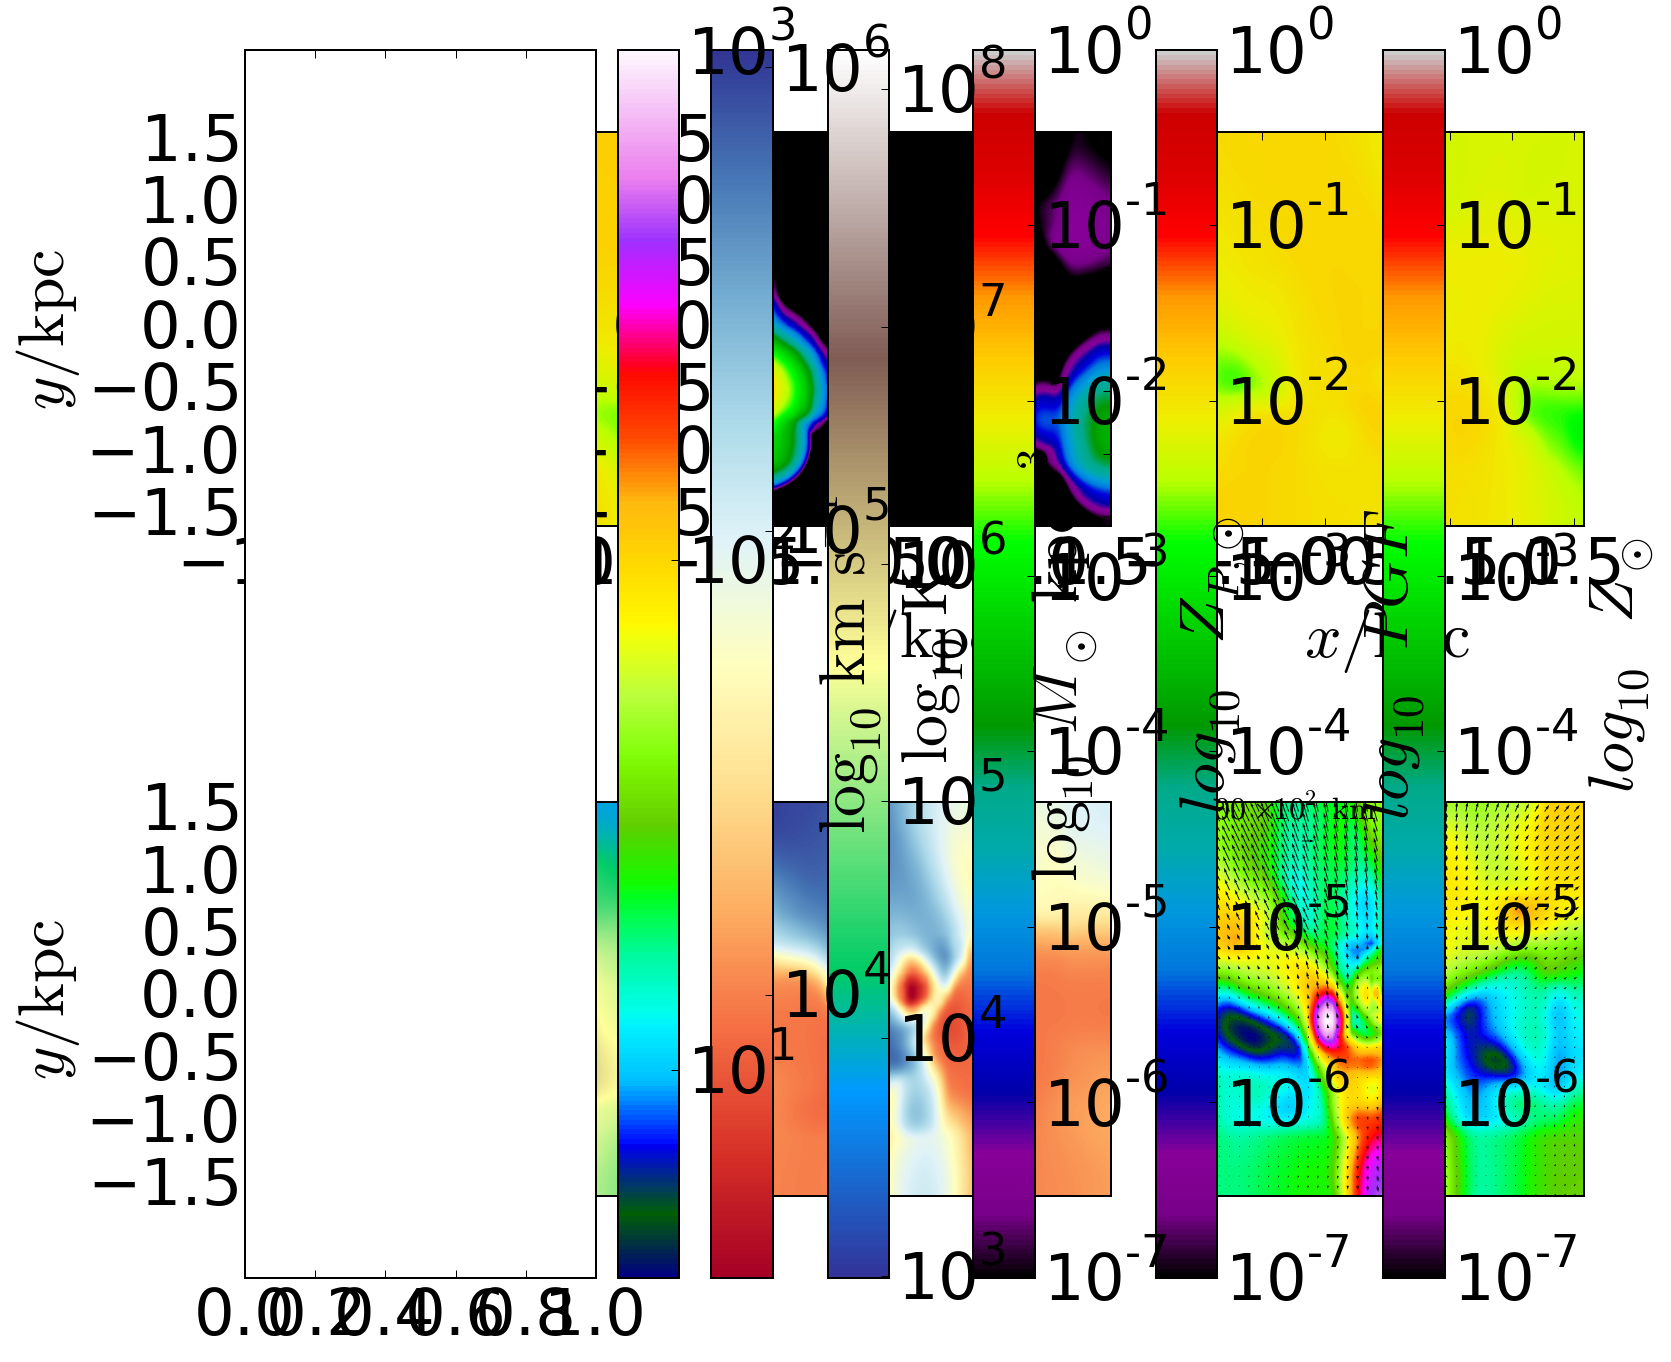

In [73]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    #ax.set_xlabel(fontsize=40)
    titleStr = "$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax1,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\;Z_{\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
            
    titleStr = "PGF - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pgf",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax2,
                      log=True, vmax = 1.0, vmin=1e-7, qtytitle="$log_{10}\; PGF$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,

    ax3.yaxis.set_visible(False)
    titleStr = "$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax3,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{P, \odot}$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,

    ax4.xaxis.set_visible(False)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax4
                      ); #vmin=0.006, vmax=1.0,

    ax5.xaxis.set_visible(False)
    ax5.yaxis.set_visible(False)
    titleStr = "Temp - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax5
                      ); #vmin=0.006, vmax=1.0,

    ax6.xaxis.set_visible(False)
    ax6.yaxis.set_visible(False)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',#qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax6,
                   show_cbar=True, vector_color='black')
    fileOut="img-z=%.1lf-%i.pdf"% (z,i)
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.show(fig)


INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...


$Z_{\odot}$ - z = 8.0
PGF - z = 8.0

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



$Z_{P, \odot}$ - z = 8.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



Density - z = 8.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



Temp - z = 8.0

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...



$v_{t}$ @ z = 8.0
Thin slice @ [121.77, 104.01, 203.1]

INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...
INFO:pynbody.sph:Rendering image on 128 threads...


AttributeError: 'NoneType' object has no attribute 'index'

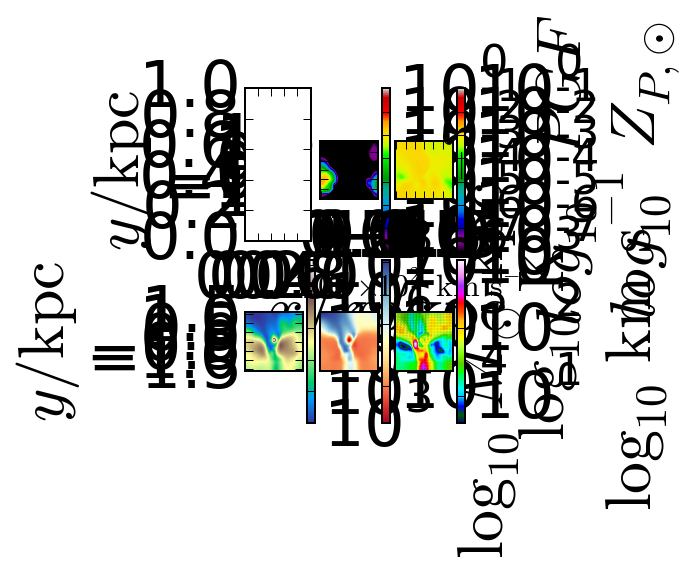

In [87]:
import matplotlib.gridspec as gridspec
plt.figure(figsize = (4,4))
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    plt.figure(figsize = (2,3))
    gs1 = gridspec.GridSpec(2, 3)
    gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

    ax1 = plt.subplot(gs1[0])
    ax1.yaxis.set_visible(False)
    #ax.set_xlabel(fontsize=40)
    fileOut="img_Z-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax1,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\;Z_{\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,

    ax2 = plt.subplot(gs1[1])
    fileOut="img_PGF-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "PGF - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pgf",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax2,
                      log=True, vmax = 1.0, vmin=1e-7, qtytitle="$log_{10}\; PGF$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
            
    ax3 = plt.subplot(gs1[2])
    ax3.yaxis.set_visible(False)
    fileOut="img_PZ-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax3,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{P, \odot}$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
            

    ax4 = plt.subplot(gs1[3])
    ax4.xaxis.set_visible(False)
    fileOut="img_Density-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax4
                      ); #vmin=0.006, vmax=1.0,

    ax5 = plt.subplot(gs1[4])
    ax5.xaxis.set_visible(False)
    ax5.yaxis.set_visible(False)
    fileOut="img_Temp-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Temp - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax5
                      ); #vmin=0.006, vmax=1.0,
    
    ax6 = plt.subplot(gs1[5])
    ax6.xaxis.set_visible(False)
    ax6.yaxis.set_visible(False)
    fileOut="img_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',#qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax6,
                   show_cbar=True, vector_color='black')
    plt.subplot(2,3,1)
    plt.show()

In [23]:
gc.collect()

0